In [1]:


import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
from sklearn.model_selection import train_test_split
import os
import imageio
import cv2
import glob2
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
import glob

In [3]:
%pwd
#'C:\\Users\\Thomas\\Malaria Project'

'C:\\Users\\Thomas\\Malaria Project'

In [5]:
example_image = imageio.imread('example.png')

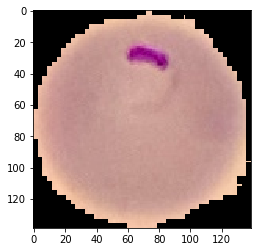

In [8]:
plt.imshow(example_image)

In [5]:
parasitized_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\')
#Importing the data for the parasitized cells

uninfected_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Uninfected')
#importing uninfected cell image data


In [6]:
print(len(parasitized_cells))
print(len(uninfected_cells))
#confirming all the data was put in 

13780
13780


In [29]:
data = []
labels = []

for img in parasitized_cells:
    try:
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        print("Error with Parasitized cell")
        
for img in uninfected_cells:
    try: 
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Uninfected\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        print("Error with uninfected cell")


Error with Parasitized cell
Error with uninfected cell


### Journaling an error
Doing a basic for loop above for some reason creates an error:
"OSError: cannot identify image file 'C:\\Users\\Thomas\\Malaria Project\\Parasitized\\Thumbs.db'"

I tried searching for Thumbs.db but I could not find it so probalby some kind of hidden file and that is what required a try/except loop instead of a simple for loop.  This was not a problem I had anticipated. 

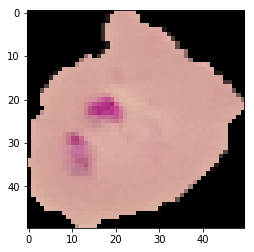

In [10]:
#Checking to see if the images were imported
plt.imshow(data[3])
plt.show()

In [30]:
image_data = np.array(data)
labels = np.array(labels)

In [31]:
image_data

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [22]:
image_data[13778]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [33]:
labels
collections.Counter(labels)

Counter({1: 13779, 0: 13779})

### Question for mentor  

Why did I just do the above cell?  I am not sure why I did the above cell outside of because someone else I saw did it. I could use some explanation as to why the above cell is needed

In [34]:
#Train test split time
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = .2, random_state = 42)

In [35]:
import collections

collections.Counter(y_test)


Counter({1: 2809, 0: 2703})

I broke the code somehow.  There are supposed to be roughly equal 0 and 1 cells and yet all of the cells in the test set are 1 as of 10/29/19.   I don't know why. 

Edit:  10/20/19    Figured out the issue.   I had a typo where i forgot to change the folder name from parasitized to uninfected.   Still not sure why it only imported everything once instead of doubling up everything.  Another question for another time. 

In [36]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test  = np_utils.to_categorical(y_test, num_classes = 2)

In [37]:
print(f"Shape of training image data : {x_train.shape}")
print(f"Shape of testing image data : {x_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training image data : (22046, 50, 50, 3)
Shape of testing image data : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels: (5512, 2)


In [38]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers



In [39]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

Taking a lot from https://www.kaggle.com/harshel7/detecting-malaria-val-accuracy-97

There's a lot of stuff that I'm not quite understanding and I'm not sure what to change in the model to make it unique that would be beneficial in any meaningful way. 

In [42]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, 
                channels = channels)
model.summary()

W1030 00:03:00.475144 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 00:03:01.242913 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1030 00:03:01.359726 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1030 00:03:01.466555 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1030 00:03:01.497007 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:174:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [43]:
#compiling the model 
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
              metrics = ['accuracy'])

W1030 00:03:39.072808 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



I don't know what this error means or how to help:

W1030 00:03:39.072808 39780 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

I have no idea how to fix this or even if I need to fix it

In [44]:
first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

W1030 00:05:18.408168 39780 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
22046/22046 [==============================] - 157s 7ms/step - loss: 0.5618 - acc: 0.7664
Epoch 2/20
22046/22046 [==============================] - 160s 7ms/step - loss: 0.2217 - acc: 0.9179
Epoch 3/20
22046/22046 [==============================] - 146s 7ms/step - loss: 0.1763 - acc: 0.9379
Epoch 4/20
22046/22046 [==============================] - 228s 10ms/step - loss: 0.1708 - acc: 0.9437
Epoch 5/20
22046/22046 [==============================] - 376s 17ms/step - loss: 0.1638 - acc: 0.9446
Epoch 6/20
22046/22046 [==============================] - 344s 16ms/step - loss: 0.1596 - acc: 0.9479
Epoch 7/20
22046/22046 [==============================] - 328s 15ms/step - loss: 0.1557 - acc: 0.9492
Epoch 8/20
22046/22046 [==============================] - 280s 13ms/step - loss: 0.1493 - acc: 0.9516
Epoch 9/20
22046/22046 [==============================] - 292s 13ms/step - loss: 0.1502 - acc: 0.9493
Epoch 10/20
22046/22046 [==============================] - 271s 12ms/step - loss: 0.1

### Mentor question
These epochs are taking a very long time.  Some of them from 328 seconds down to about 150 when the example I saw took only about 9 seconds per epoch. Why is my notebook taking so much longer then his?  My computer is fairly powerful and can run all the new video games so something is wrong here and I need to figure out what. 

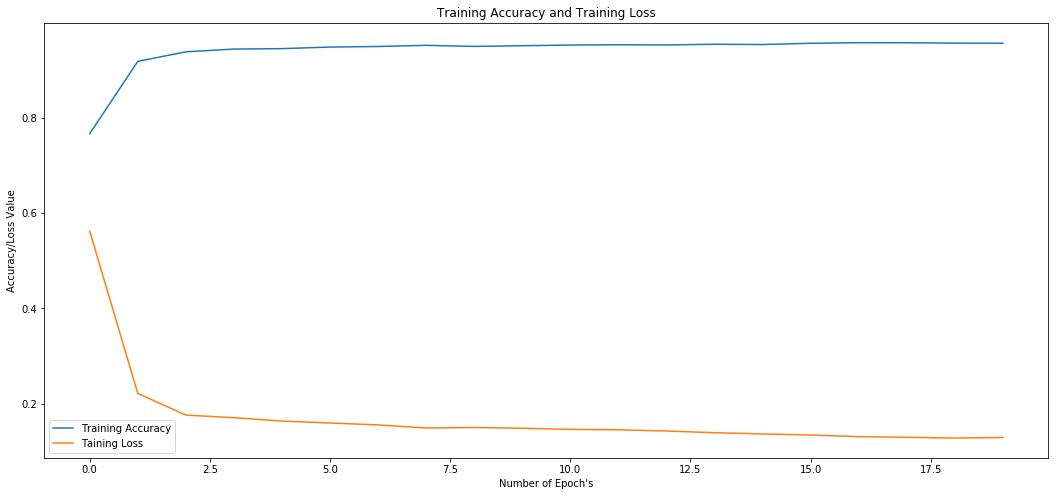

In [45]:
plt.figure(figsize = (18,8))
plt.plot(range(20), first_model.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), first_model.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
#graphing how the accuracy and loss change over the epochs

In [46]:
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 10s 2ms/step


In [47]:


print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')



LOSS : 0.1375003394242295
ACCURACY : 0.9551886792452831


Got a 95.5% accuracy score on the model.  This is without any data augmentation. 

In [9]:
folder = glob.glob(r'C:\Users\Thomas\Malaria Project\example_folder')

images_list = []

for folder in folder:
    for f in glob.glob(folder + '/*.png'):
        images_list.append(f)
        
read_images = []
#cv2.imread second argument is way image should be read, 1 is color, 0 is grayscale
for image in images_list:
    read_images.append(cv2.imread(image, 1))

In [11]:
print(len(read_images))

53


### The above few cells are just setting up smaller sets of data for testing my code.  In my final version these will not be in there and I will just simply jump straight into the code itself.  

Testing my code on about 26000 images sounds very annoying to wait for every time I want to run this thing. 